<a href="https://colab.research.google.com/github/riyasai22/TSF-GRIP-tasks-/blob/main/gripaug_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**THE SPARKS FOUNDATION**

#**Data Science and Business Analytics**

### Task-1 Prediction using Supervised ML

Riya Srisailam Sailesh

Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Reading the Data

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

Data Exploration

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<function matplotlib.pyplot.show>

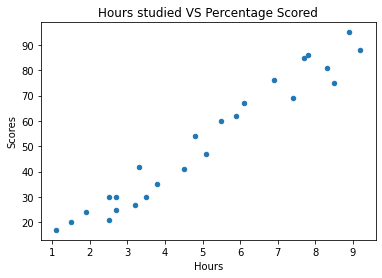

In [7]:
#plotting the distribution of scores
df.plot(kind="scatter",x="Hours",y="Scores",style='o')
plt.title("Hours studied VS Percentage Scored")
plt.show

From the above plot, we can see a positive linear relation between the no. of hours studied and the percentage scored.

In [8]:
correlation_matrix=df.corr()
correlation_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


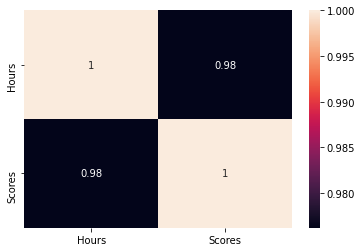

In [9]:
sns.heatmap(correlation_matrix,annot=True)

Preparing the Data

In [10]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

Train Test Split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
#Training the simple linear regression model on the training set
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Regression Line
line=regressor.coef_*x+regressor.intercept_

In [14]:
print(regressor.coef_[0])
print(regressor.intercept_)

9.682078154455697
2.826892353899737


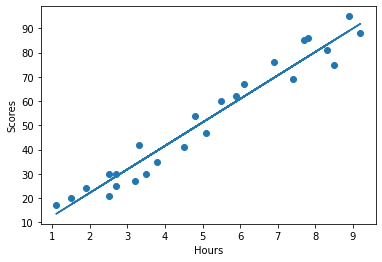

In [15]:
#Visualizing the regression line
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Predicting the Results

In [16]:
y_pred=regressor.predict(x_test)

In [17]:
dataframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dataframe

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


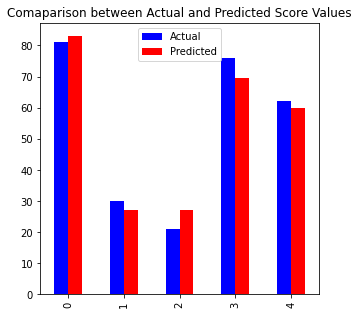

In [18]:
dataframe.plot(kind='bar',figsize=(5,5), color=["B", "R"], title= "Comaparison between Actual and Predicted Score Values")

What will be the predicted score if a student studies for 9.25 hrs/day?

In [19]:
hours=[9.25]
pred_score=regressor.predict([hours])
print(pred_score[0])

92.38611528261494


Model Evaluation

In [20]:
#1. Mean Absolute Error
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error: ',mae)

#2. Root mean squared error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',rmse)

#3. Coefficient of determination
r2=r2_score(y_test,y_pred)
print("R-squared: ",r2)

Mean Absolute Error:  3.9207511902099244
Root Mean Squared Error:  4.352380006653288
R-squared:  0.9678055545167994


In [21]:
print("Hence, we can conclude that the accuracy of the model is {}%".format(round(r2*100,2)))

Hence, we can conclude that the accuracy of the model is 96.78%


CONCLUSION

Through this task, I have been able to apply basic concepts like data exploration and model evaluation on the simple linear regression model and successfully carry out the prediction with an accuracy of 96.78%.
